In [1]:
#install.packages("jsonlite")
#install.packages("ggmap")
#install.packages("geosphere")
#install.packages("dint")

In [1]:
library("jsonlite")
library("ggmap")
library("geosphere")
library("ggplot2")


Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [31]:
infraction1 <- read.csv("C:/Users/Administrator/Desktop/R/Parking_Tags_Data_2018_1.csv" )
infraction2 <- read.csv("C:/Users/Administrator/Desktop/R/Parking_Tags_Data_2018_2.csv" )
infraction3 <- read.csv("C:/Users/Administrator/Desktop/R/Parking_Tags_Data_2018_3.csv" )

result <- fromJSON("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b66466c3-69c8-4825-9c8b-04b270069193/resource/059cde7d-21bc-4f24-a533-6c2c3fc33ef1/download/green-p-parking-2019.json")
GP<- data.frame(result)
TTCStop <- read.delim2("C:/Users/Administrator/Desktop/R/stops.txt", header = TRUE, sep = "," )

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [32]:
infraction <- rbind(infraction1,infraction2,infraction3)

In [34]:
#Top 20 tickets by frequency
freq <- data.frame(table(infraction$location2 ))
colnames(freq)[colnames(freq) == 'Var1'] <- 'location2'
freq2 <- freq[order(-freq$Freq),][1:20,]
freq2

,location2,Freq
23780,20 EDWARD ST,3903
25119,2075 BAYVIEW AVE,3530
9246,1265 MILITARY TRL,2879
14138,15 MARINE PARADE DR,2553
33942,273 BLOOR ST W,2482
22918,2 COOPER ST,2383
31494,250 FRONT ST E,2373
78669,1 BRIMLEY RD S,2360
78374,WELLINGTON ST W,2312
77350,LA PLANTE AVE,2233


In [35]:
#Top 20 infraction type by frequency 
infra_code <- data.frame(table(infraction$infraction_code ))
colnames(infra_code)[colnames(infra_code) == 'Var1'] <- 'infraction_code'
infra_code_freq <- infra_code[order(-infra_code$Freq),][1:20,]
infra_code_freq

,infraction_code,Freq
3,3,318981
5,5,273227
25,29,241277
65,207,187727
2,2,91972
9,9,84457
135,406,71278
8,8,59632
132,403,55456
6,6,41949


In [36]:
#Top 20 infraction location by revenue
revenue <- aggregate(infraction$set_fine_amount, by=list(infraction$location2),FUN=sum,na.rm=TRUE )
colnames(revenue)[colnames(revenue) == 'x'] <- 'revenue'
colnames(revenue)[colnames(revenue) == 'Group.1'] <- 'location'
revenue2 <- revenue[order(-revenue$revenue),][1:20,]
revenue2

,location,revenue
46947,40 ORCHARD VIEW BLVD,312180
25568,21 HILLCREST AVE,262500
47878,410 COLLEGE ST,241425
78669,1 BRIMLEY RD S,237620
19797,18 GRENVILLE ST,235070
14459,150 DAN LECKIE WAY,187170
23780,20 EDWARD ST,181730
33942,273 BLOOR ST W,148020
77260,JAMES ST,127790
27134,22 MC CAUL ST,119400


In [37]:
#Top 20 infraction type by revenue
revenue_type <- aggregate(infraction$set_fine_amount, by=list(infraction$infraction_code),FUN=sum,na.rm=TRUE )
colnames(revenue_type)[colnames(revenue_type) == 'x'] <- 'revenue'
colnames(revenue_type)[colnames(revenue_type) == 'Group.1'] <- 'infraction_code'
revenue_infraction_code <- revenue_type[order(-revenue_type$revenue),][1:20,]
revenue_infraction_code

,infraction_code,revenue
5,5,13660650
3,3,9568995
132,403,8318400
25,29,7238280
65,207,5631810
9,9,5066880
8,8,3577860
135,406,2851120
62,192,2822250
104,347,2576000


In [38]:
#total revenue
sum(infraction$set_fine_amount, na.rm = TRUE)


[1] 81411880

In [174]:
# Distance to closest parking lots for top 20 infractions

In [46]:
register_google(key = "XXXXXXXXXXXXXX"

In [47]:
GPlist <- GP$carparks.address
GPmasg <- paste( GPlist, ",Toronto,Ontario,Canada")
GPlistlocation <- geocode(GPmasg)
GPlist2<-data.frame(GPlist,GPlistlocation)


Source : https://maps.googleapis.com/maps/api/geocode/json?address=20+Charles+Street+East+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=13+Isabella+Street+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=15+Wellesley+Street+East+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=21+Pleasant+Blvd.+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=30+Alvin+Avenue+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=20+Delisle+Avenue+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=716+Pape+Avenue+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=351+Keele+Street+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/js

In [48]:
infralist <- paste( freq2$location2, ",Toronto,Ontario,Canada")
infralocation <- geocode(infralist,messaging = FALSE)
toplist<-data.frame(freq2$location2,infralocation)
colnames(toplist)[colnames(toplist) == 'freq2.location2'] <- 'location'


Source : https://maps.googleapis.com/maps/api/geocode/json?address=20+EDWARD+ST+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=2075+BAYVIEW+AVE+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=1265+MILITARY+TRL+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=15+MARINE+PARADE+DR+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=273+BLOOR+ST+W+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=2+COOPER+ST+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=250+FRONT+ST+E+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=1+BRIMLEY+RD+S+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=WELLINGTON+ST+W+

In [49]:
#Closest disance to greenparking
n <- nrow(infralocation)
m <- nrow(GPlistlocation)

closest_loc_list <- vector(mode = "list", length = 20)
closest_distance_list <- vector(mode = "list", length = 20)
#closest_loc <- NULL
#closest_distance <- NULL
for (i in 1:n) {
    closest_loc <- NULL
    closest_distance <- NULL
    current_distance <- NULL
    for (j in 1:m) {  
       # print(j)
        current_distance <- distm(infralocation[i,],GPlistlocation[j,] , fun = distHaversine)
        #print(current_distance)
        #print(GPlist[j]  )
        #print(closest_distance)
        #print(closest_loc)
        #print(i)
        if (is.null(closest_loc)){  
           # print(j)
            closest_loc <- GPlist[j]          
            closest_distance <- current_distance  
        }
        else if (current_distance < closest_distance) {
            closest_loc <- GPlist[j]
            closest_distance <- current_distance
        }
        else
            next
    }
    closest_loc_list[i] <- closest_loc
    closest_distance_list[i] <- closest_distance
    #print(closest_loc )
    #print(closest_distance )
}



cbind(infralist,closest_loc_list,closest_distance_list)

infralist,closest_loc_list,closest_distance_list
"20 EDWARD ST ,Toronto,Ontario,Canada",20 Dundas Square,147.0291
"2075 BAYVIEW AVE ,Toronto,Ontario,Canada",2170 Bayview avenue,554.1368
"1265 MILITARY TRL ,Toronto,Ontario,Canada",284 Milner Avenue,4084.3
"15 MARINE PARADE DR ,Toronto,Ontario,Canada",15 Marine Parade Drive,0
"273 BLOOR ST W ,Toronto,Ontario,Canada",9 Bedford Road,156.9802
"2 COOPER ST ,Toronto,Ontario,Canada",2 Church Street (St. Lawrence Garage),387.6626
"250 FRONT ST E ,Toronto,Ontario,Canada",271 Front Street East,117.2844
"1 BRIMLEY RD S ,Toronto,Ontario,Canada",1 Brimley Road (Bluffer's Park),0
"WELLINGTON ST W ,Toronto,Ontario,Canada",363 Adelaide Street West,295.0536
"LA PLANTE AVE ,Toronto,Ontario,Canada",130 Elizabeth Street - Toronto Coach Terminal,395.2514


In [ ]:
# Distance to closest TTC stop for top 20 infractions

In [ ]:
#Data volumn is huge
TTClist <- paste( TTCStop$stop_name, ",Toronto,Ontario,Canada")
TTClistlocation <- geocode(TTClist)
TTClist2<-data.frame(TTClist,TTClistlocation, messaging = FALSE)

In [ ]:
#Closest disance to TTC
closest_loc <- NULL
closest_distance <- NULL
n <- nrow(infralocation)
m <- nrow(TTClistlocation)


closest_loc_list <- vector(mode = "list", length = 20)
closest_distance_list <- vector(mode = "list", length = 20)
#closest_loc <- NULL
#closest_distance <- NULL
for (i in 1:n) {
    closest_loc <- NULL
    closest_distance <- NULL
    current_distance <- NULL
    for (j in 1:m) {  
       # print(j)
        current_distance <- distm(infralocation[i,],TTClistlocation[j,] , fun = distHaversine)
        print(current_distance)
        print(TTClist[j]  )
        print(closest_distance)
        print(closest_loc)
        print(i)
        if (is.null(closest_loc)){  
           # print(j)
            closest_loc <- TTClist[j]          
            closest_distance <- current_distance  
        }
        else if (current_distance < closest_distance) {
            closest_loc <- TTClist[j]
            closest_distance <- current_distance
        }
        else
            next
    }
    closest_loc_list[i] <- closest_loc
    closest_distance_list[i] <- closest_distance
    #print(closest_loc )
    #print(closest_distance )
}


cbind(infralist,closest_loc_list,closest_distance_list)


In [15]:
#Impact of day of week/ month&season of year in all infractions

In [44]:
week_day <-NULL
w <- as.character(infraction$date_of_infraction)
n <- NROW(infraction$date_of_infraction)
for (i in 1:n) {
    week_day[i] <- weekdays(as.Date(w[i],"%Y%m%d"))  
         
}

infraction_by_dayofweek <- data.frame(table(week_day))

infraction_by_dayofweek

week_day,Freq
iSonto,168697
uLwesibili,259983
uLwesihlanu,263242
uLwesine,265843
uLwesithathu,259979
uMgqibelo,210944
uMsombuluko,230921


In [45]:
month <-NULL
w <- infraction$date_of_infraction
n <- NROW(infraction$date_of_infraction)
for (i in 1:n) {
    month[i] <- substr(w[i],5,6)  
         
}

infraction_by_monthofyear <- data.frame(table(month))

infraction_by_monthofyear

month,Freq
01,154625
02,146038
03,64658
05,78107
06,172458
07,167364
08,170214
09,166015
10,194888
11,178131


In [ ]:
seasonList[3]

In [ ]:
#distribution by  year,month,fines

In [40]:
chart_month <- function(df){
        chart1<-ggplot(df, aes(x = month , y = Freq))+geom_bar(fill = "#0073C2FF", stat = "identity",size = 3)
    return(chart1)}


chart_year <- function(df){
        chart1<-ggplot(df, aes(x = year , y = Freq))+geom_bar(fill = "#0073C2FF", stat = "identity",size = 3)
    return(chart1)}

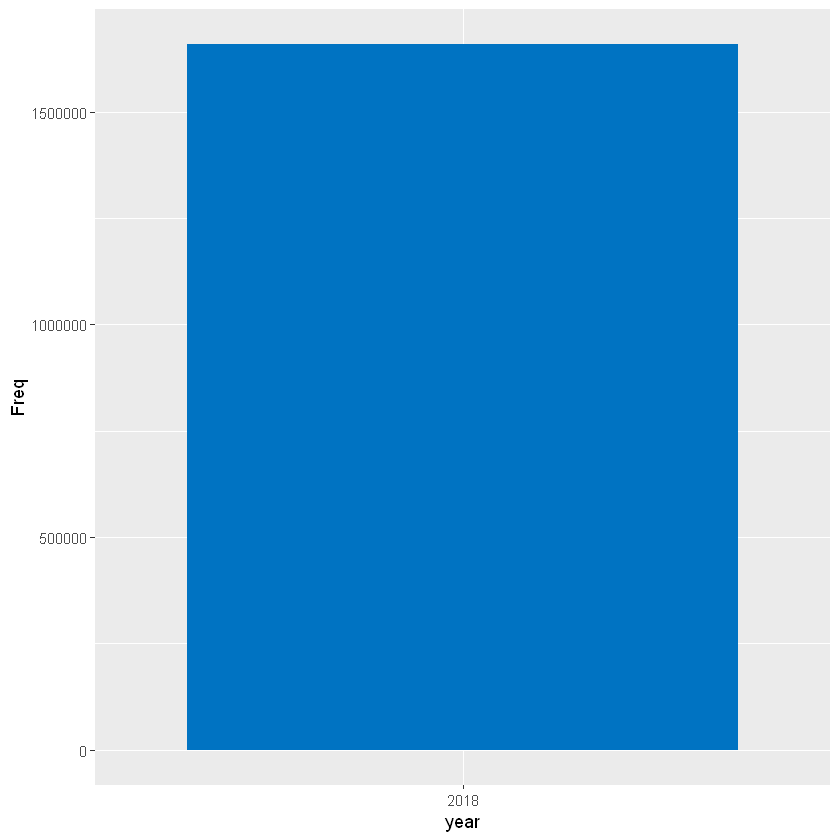

In [41]:
year <- substr(infraction$date_of_infraction, 1, 4)
yeardis <- data.frame(table(year))
chart_year(yeardis)

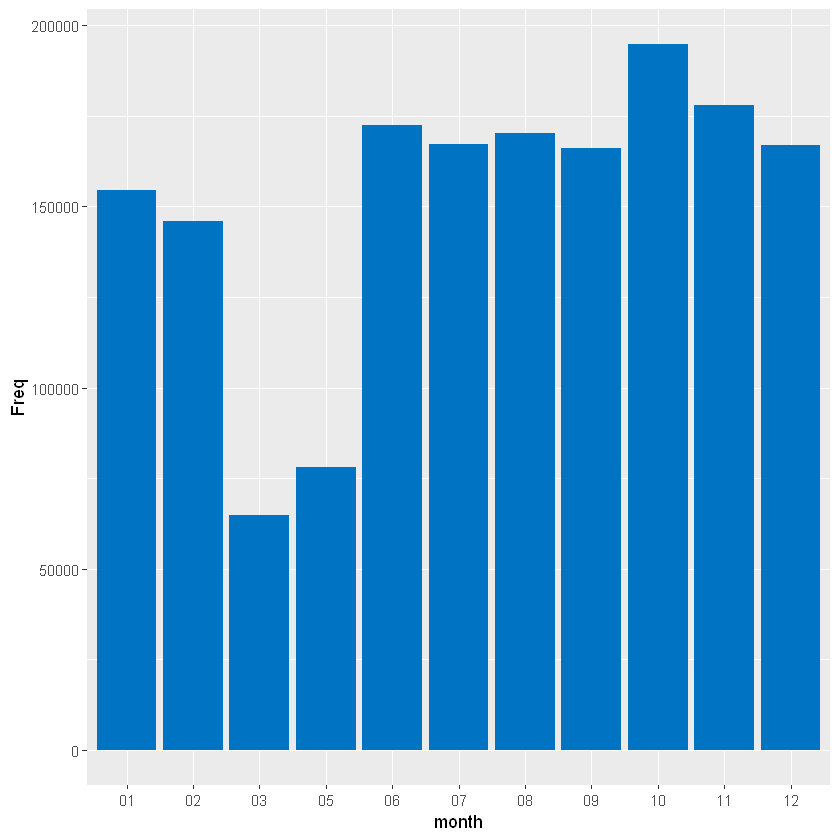

In [42]:
month <- substr(infraction$date_of_infraction, 5, 6)
monthdis <- data.frame(table(month ))
chart_month(monthdis)

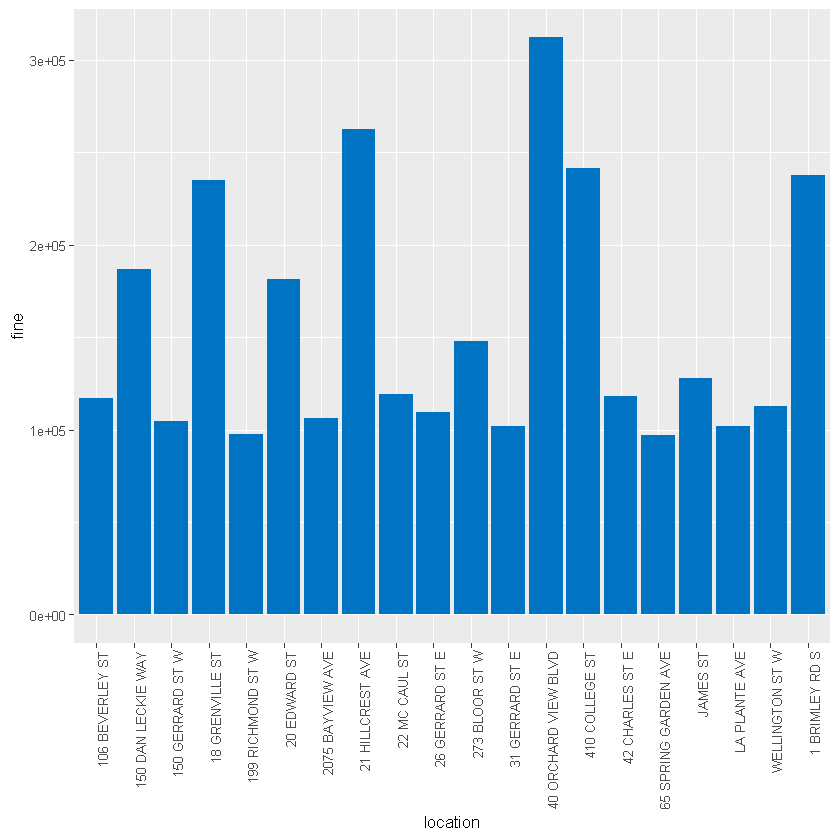

In [43]:

colnames(revenue2)[colnames(revenue2) == 'revenue'] <- 'fine'
ggplot(revenue2, aes(x = location, y = fine))+geom_bar(fill = "#0073C2FF", stat = "identity",size = 1)+theme(text = element_text(size=10),
        axis.text.x = element_text(angle=90, hjust=1)) 

In [ ]:
#write.csv(result2)